In [4]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag2/SpectralClustering聚类(2到7)结果(sqrt(log)非线性变化).csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)
data6=data5.drop('2个簇',axis=1)
data6

,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,1.000000,1.086107,1.125425,1.049860,1.012037,1.012122,1.007277,1.028101,1.026087,1.077010,...,1.127535,1.037246,1.038669,1.039868,1.013062,1.040494,1.018820,1.043064,1.098404,1.053658
1,1.000000,1.065734,1.130857,1.046616,1.012922,1.001951,1.097933,1.037756,1.028863,1.065720,...,1.110973,1.031322,1.040840,1.027789,1.053883,1.080079,1.045182,1.074915,1.098404,1.073867
2,1.000000,1.086107,1.125425,1.058357,1.003784,1.001652,1.081133,1.028101,1.021880,1.063361,...,1.106948,1.026505,1.041920,1.056253,1.059749,1.070805,1.036627,1.103439,1.109965,1.071408
3,1.000000,1.058649,1.130183,1.054136,1.009011,1.002923,1.119050,1.021921,1.016185,1.058325,...,1.060177,1.021617,1.042997,1.008801,1.142625,1.062004,1.027843,1.070172,1.092464,1.071408
4,1.000000,1.082799,1.130857,1.056253,1.010540,1.010958,1.063413,1.038943,1.042402,1.105686,...,1.076158,1.019146,1.041110,1.087599,1.080852,1.069428,1.045182,1.108665,1.100917,1.043064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.145976,1.062211,1.130857,1.065615,1.003343,1.006271,1.081133,1.071623,1.083480,1.135853,...,1.119848,1.045363,1.038669,1.070959,1.081333,1.035696,1.027843,1.090241,1.113194,1.104237
4047,1.000000,1.036425,1.124739,1.066639,1.002302,1.002430,1.051041,1.003975,1.011848,1.082512,...,1.119848,1.066434,1.042997,1.060920,1.054231,1.056757,1.009543,1.078556,1.088152,1.115195
4048,1.000000,1.072668,1.125425,1.064588,1.007475,1.002467,1.031561,1.085271,1.073987,1.095631,...,1.097704,1.111480,1.076921,1.060920,1.036820,1.078670,1.084892,1.117036,1.098404,1.090574
4049,1.000000,1.032571,1.122673,1.046616,1.004381,1.006522,1.047874,1.041304,1.041073,1.093936,...,1.115934,1.070702,1.040569,1.058128,1.048086,1.059091,1.036627,1.122949,1.072138,1.043064


In [5]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

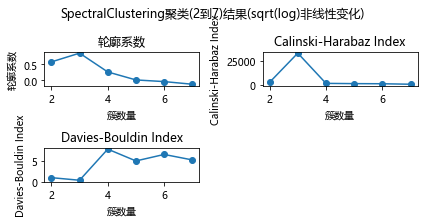

In [6]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(2到7)结果(sqrt(log)非线性变化)')
plt.tight_layout()
plt.show()